## Predicting house prices with linear regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
houses_df = pd.read_csv('housing_price_regression.csv')

### Dataset consists of 2051 homes and initially had 80 features (up to 278 from dummy variables)
##### I cleaned the dataset beforehand

In [3]:
houses_df.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,target
0,109,533352170,0.0,13517,6,8,1976,2005,289.0,533.0,...,0,0,0,0,0,0,0,0,1,130500
1,544,531379050,43.0,11492,7,5,1996,1997,132.0,637.0,...,0,0,0,0,0,0,0,0,1,220000
2,153,535304180,68.0,7922,5,7,1953,2007,0.0,731.0,...,0,0,0,0,0,0,0,0,1,109000
3,318,916386060,73.0,9802,5,5,2006,2007,0.0,0.0,...,0,0,0,0,0,0,0,0,1,174000
4,255,906425045,82.0,14235,6,8,1900,1993,0.0,0.0,...,0,0,0,0,0,0,0,0,1,138500


In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 279 entries, Id to target
dtypes: float64(25), int64(254)
memory usage: 4.4 MB


In [5]:
houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
Lot Frontage,2051.0,5.794442e+01,3.313733e+01,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
...,...,...,...,...,...,...,...,...
Sale Type_ConLw,2051.0,2.437835e-03,4.932625e-02,0.0,0.0,0.0,0.0,1.0
Sale Type_New,2051.0,7.801073e-02,2.682539e-01,0.0,0.0,0.0,0.0,1.0
Sale Type_Oth,2051.0,1.950268e-03,4.412952e-02,0.0,0.0,0.0,0.0,1.0
Sale Type_WD,2051.0,8.683569e-01,3.381848e-01,0.0,1.0,1.0,1.0,1.0


### Target is price

In [6]:
houses_df['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [7]:
y = houses_df['SalePrice']
X = houses_df.drop(columns=['SalePrice', 'target'])

### Train/test split - this should technically be done before data cleaning and manipulation!

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1538, 277), (1538,), (513, 277), (513,))

### Running a simple linear model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()

In [13]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
linreg.score(X_train, y_train)

0.9461962541415644

In [15]:
linreg.score(X_test, y_test)

0.9161109817486983

In [17]:
predictions = linreg.predict(X_test)

In [18]:
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [19]:
adjusted_r_suared(.9161109817487165, 513, 277)

0.817229032575927

#### Generating predictions to compare to actual prices

In [20]:
linreg_results_df = pd.DataFrame(linreg.predict(X_test), y_test).reset_index()

In [21]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [22]:
linreg_results_df.head()

,Actual_Price,Predicted_Price
0,132500,130429.418828
1,226000,214393.707844
2,250000,306450.582455
3,128000,118340.425123
4,203160,203009.737674


### But what does the R^2 score really mean to most people (stakeholders, homebuyers, etc?) Let's get some results that can actually be communicated

In [23]:
from sklearn.metrics import mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# RMSE

(mean_squared_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) ** .5)

22695.388224582028

In [25]:
# Mean House Price

linreg_results_df['Actual_Price'].mean()

182692.03118908382

In [26]:
# Average prediction error per house (percentage)

((mean_squared_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) ** .5) /
linreg_results_df['Actual_Price'].mean())

0.12422757619401913

In [27]:
# Median Absolute Error

median_absolute_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price'])

10680.691858148668

In [28]:
#Median House Price

linreg_results_df['Actual_Price'].median()

163000.0

In [29]:
# Average error from median (percentage)

(median_absolute_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) /
linreg_results_df['Actual_Price'].median())

0.06552571692115747

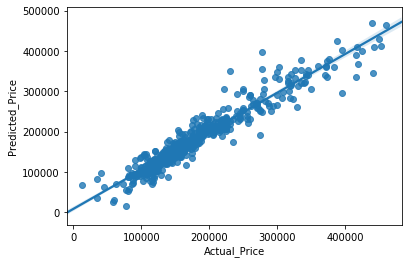

In [30]:
sns.regplot(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price'])

### Let's use regularization

In [31]:
from sklearn.linear_model import LassoCV, RidgeCV

### Lasso Regularizer

In [32]:
lasso = LassoCV(cv = 5)

In [33]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
lasso.score(X_train, y_train)

0.06898444385386371

In [35]:
lasso.score(X_test, y_test)

0.052083604402481054

#### Terrible R^2 - What happened here? We'll fix it later

In [36]:
pd.DataFrame(lasso.coef_, X.columns)

,0
Id,-0.000000
PID,-0.000111
Lot Frontage,0.000000
Lot Area,0.000000
Overall Qual,0.000000
...,...
Sale Type_ConLI,0.000000
Sale Type_ConLw,-0.000000
Sale Type_New,0.000000
Sale Type_Oth,-0.000000


### Ridge Regularizer

In [37]:
ridge = RidgeCV(cv = 5)

In [38]:
ridge.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.61503e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.59328e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40908e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.59702e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.75533e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAl

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [39]:
ridge.score(X_train, y_train)

0.9084024987452084

In [40]:
ridge.score(X_test, y_test)

0.9107831963501054

In [41]:
ridge_pred = ridge.predict(X_test)

In [42]:
median_absolute_error(y_test, ridge_pred)

11512.856606313959

In [43]:
ridge.coef_

array([-7.89369829e+00, -5.72404772e-07, -1.14768617e+01,  6.20954426e-01,
        1.00571587e+04,  4.64187093e+03,  2.76255494e+02,  9.37765356e+01,
        2.52208331e+01,  2.22300228e+00,  6.17130578e+00, -1.91570414e+00,
        6.47860416e+00,  7.70640146e+00,  1.54004442e+01,  4.28185289e+00,
        2.73886963e+01,  8.14636695e+03,  1.22599212e+03,  6.08248925e+03,
        4.59923637e+03, -9.49305662e+02, -1.02227839e+04,  2.53631029e+03,
        4.46045712e+03, -3.84680775e+00,  7.88645636e+03,  2.41592938e+00,
        1.53055668e+01,  4.13150173e+00,  1.46004568e+01,  4.13661845e+01,
        8.92197287e+01, -7.27072858e+01, -1.30210205e+01, -1.02215626e+02,
       -4.98566386e+03, -5.73315745e+03, -4.38351393e+03, -2.24559976e+02,
       -3.36753721e+03,  6.50504069e+03,  9.44671102e+03,  8.58767449e+02,
        4.85736924e+03,  4.03568873e+03,  1.15461780e+03,  5.27214973e+03,
        5.86964161e+03, -1.45194678e+03,  7.99055461e+02, -1.95011701e+03,
       -4.45284155e+03,  

#### This is actually performing worse than our original linear regression model! You don't always need to regularize!

### OK, let's fix our lasso

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss = StandardScaler()

In [46]:
X_train_sc = ss.fit_transform(X_train)

In [47]:
X_test_sc = ss.transform(X_test)

In [48]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [49]:
lasso.score(X_train_sc, y_train)

0.9105517930755569

In [50]:
lasso.score(X_test_sc, y_test)

0.9048054173227886

### Let's try logging our target data

In [51]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

#### Lasso

In [52]:
lasso.fit(X_train_sc, y_train_log)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0282153606468718, tolerance: 0.019620355138859034
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [53]:
lasso.score(X_train_sc, y_train_log)

0.9181771628927036

In [54]:
lasso.score(X_test_sc, y_test_log)

0.8877731144679762

In [55]:
(lasso.coef_ == 0).sum()

188

#### Ridge

In [56]:
ridge.fit(X_train_sc, y_train_log)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [57]:
ridge.score(X_train_sc, y_train_log)

0.9488438473906473

In [58]:
ridge.score(X_test_sc, y_test_log)

0.8881469323621634

### Let's see a case where regularization will clearly help

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .8)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((410, 277), (1641, 277), (410,), (1641,))

#### No Reg

In [61]:
linreg = LinearRegression()

In [62]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
linreg.score(X_train, y_train)

0.9602103527172604

In [64]:
linreg.score(X_test, y_test)

0.5855255024466759

#### L1 Reg

In [65]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [66]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [67]:
lasso.score(X_train_sc, y_train)

0.934493448564467

In [68]:
lasso.score(X_test_sc, y_test)

0.813411927140471

#### L2 Reg

In [69]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [70]:
ridge.score(X_train_sc, y_train)

0.9557369060610366

In [71]:
ridge.score(X_test_sc, y_test)

0.7774089821483758